# Peguin Data Analysis and Classification

In this project conducted as part of a course at UCLA called Programming in Computing 16A: Introduction to Python, I conducted EDA and built classification models on a palmer peguins species dataset that includes information on three different species: Adelie, Chinstrap, Gentoo. The goal of this project is to explore the defining features that would allow us to classify the penguins into their respective species by testing and training three types of supervised machine learning models.

## Data Import and Cleaning
I began by importing the relevant packages for use in cleaning and exploring our data. I then split the data into training and testing data. This means that the models I build will be trained on a random sample of 80% of our dataset, and then the models will be tested on the remaining 20% of our dataset that the model does not see. This will be helpful when we do cross-validation, which will be discuseed later.

In [2]:
import pandas as pd
import numpy as np
import urllib
from matplotlib import pyplot as plt
import random

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
#shorten species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)

In [3]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split

np.random.seed(1423)

df = penguins
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Species"],axis = 1),
                                                    df.Species, test_size = 0.2)

In [3]:
from sklearn import preprocessing

def clean(X, y):
    """
    This function cleans our penguins data (after being split) by removing unwanted
    columns and splitting the data into our target and predictor variables.

    Parameters:
    X = split data from original data frame that includes the predictor variables
    y = split data from original data frame that includes the target variable

    Return:
    dfX = cleaned version of the predictor variables 
    dfy = cleaned version of the target variable
    - both include shortened species names, removal of NaN values, and 
      numerical representations of categorical variables (Sex, Island)
    """
    
    #convert X and y to dataframes
    dfX = pd.DataFrame(X)
    dfy = pd.DataFrame(y)
    merged = pd.concat([dfX,dfy], axis=1)
    
    #remove nan values
    columns = ["Species", "Island", "Culmen Length (mm)", "Culmen Depth (mm)", 
               "Flipper Length (mm)", "Body Mass (g)", "Sex", "Delta 15 N (o/oo)", 
               "Delta 13 C (o/oo)"]
    merged = merged.dropna(subset=columns)
    
    #remove rows with "." in Sex column
    merged = merged[merged["Sex"] != "."]
    
    #convert categorical variables to numerical representations
    le = preprocessing.LabelEncoder()
    merged['Sex'] = le.fit_transform(merged['Sex'])
    merged['Species'] = le.fit_transform(merged['Species'])
    merged['Island'] = le.fit_transform(merged['Island'])
    merged['Region'] = le.fit_transform(merged['Region'])

    # don't need name column
    cols = ["studyName", "Individual ID", "Date Egg", "Sample Number",
            "Clutch Completion", "Stage", "Comments"]
    merged = merged.drop(cols, axis = 1)

    #setting up X and y
    dfy = merged["Species"] # target variable
    dfX = merged.drop(["Species"], axis = 1) # predictor variables

    return(dfX,dfy)

In [4]:
#clean the data
X_train, y_train = clean(X_train, y_train)
X_test, y_test = clean(X_test, y_test)

## Exploratory Analysis
In this section, I perform exploratory analysis in order to get an understanding of the data and the various relationships some columns may have to each other. I also looked for features that may stand out as being potentially useful for our models. To create the three figures that you see below, I used the seaborn package from matplotlib and also created a table using the .groupby() function, which will be explained below.

**Figure 1: Scatterplot**

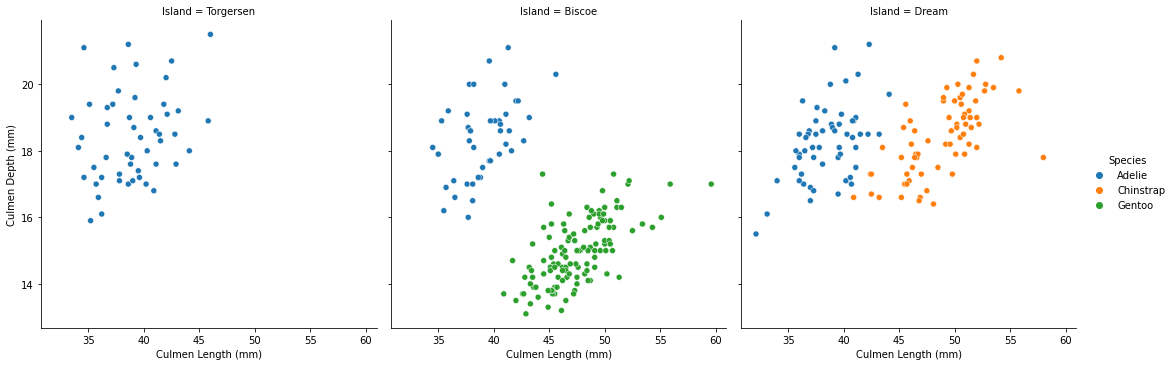

In [5]:
import seaborn as sns

#create scatter plots of Culmen Length vs Culmen Depth, 
#separated by Island, using Seaborn 
fgrid = sns.relplot(x = "Culmen Length (mm)",
                    y   = "Culmen Depth (mm)",
                    col = "Island",
                    hue = "Species",
                    data = df)

This plot compares Culmen Length in millimeters with Culmen Depth in millimeters for penguins in the dataset, separated by Island (Torgersen, Biscoe, or Dream). The results provide a few main insights. First, there appears to be a positive relationship between Culmen Length and Culmen Depth for each penguin species. Additionally, Adelie penguins tend to have a smaller Culmen Length compared to the Chinstrap and Gentoo penguins. Gentoo penguins tend to have a smaller Culmen Depth compared to the Adelie and Chinstrap penuins. The Adelie and Chinstrap penguins appear to have similar culmen Depths but the Chinstrap penguins tend to have longer Culmen Lengths. Second, plotting by Island shows us that the species of penguin varies by Island. From this we can see that: (1) Adelie penguins live on all three islands but are the only species located on Torgersen; (2) Gentoo penguins only live on Biscoe island; and (3) Chinstrap penguins only live on Dream island. Therefore, "Island" is a good categorical variable to choose for our models because it allows for the intial separation of the species on a high level.

**Figure 2: Boxplot**

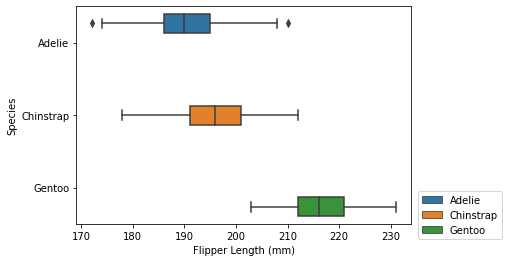

In [6]:
box = sns.boxplot(data = penguins,
                  x = "Flipper Length (mm)", y = "Species",
                  hue = "Species")

#anchors the legend to the outside of the boxplot
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

This boxplot compares the Flipper Length (in millimeters) of each Species in the penguin dataset. Gentoo penguins seem to have a significantly higher mean Flipper Length, while Adelie and Chinstrap penguins' mean Flipper Lengths are much closer in length. The range of Adelie and Chinstrap penguins' Flipper Lengths also seem to be wider than the range of the Gentoo penguins, and have a lot of overlap. This indicates that  it may be difficult to use Flipper Length (mm) as one of our predictor variables because there is so much overlap between the two. Plotting this data and separating it by species allows us to visualize the data and determine whether it is a good choice to use in our models.

**Figure 3: Histogram**

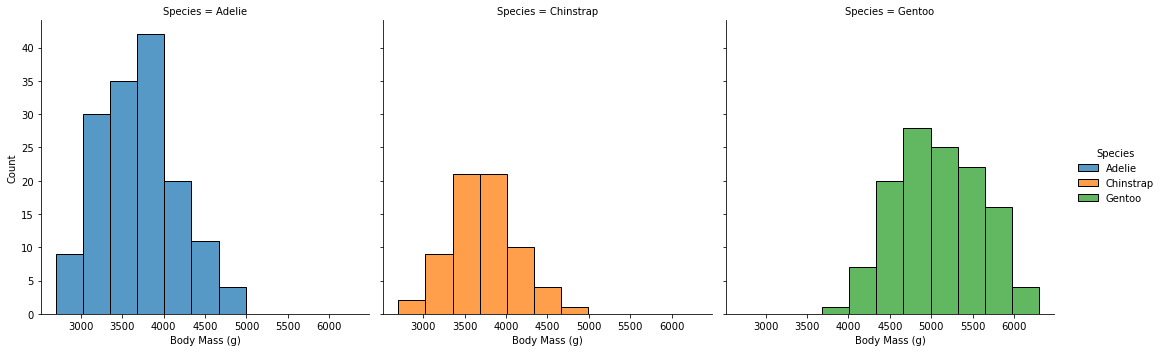

In [7]:
hist = sns.displot(data = penguins, 
                   x = "Body Mass (g)", 
                   col = "Species", 
                   hue = "Species",
                   aspect = 1)

This histogram displays the different densities of the body mass of penguins split by species. The leftmost plot being the histogram displaying the densities of the body mass of the Adelie penguins, the center plot displaying the densities of the body mass of the Chinstrap penguins, and the rightmost plot displaying the densities of the body mass of the Gentoo penguins. From the histograms you can see that the Gentoo penguins species has a higher density of penguins in the higher range of the body mass, indicating that this body mass could be a potential identifier for the various species of penguins. However, from the histograms it looks like the Adelie and Chinstrap penguins are relatively similar in body mass so it may be difficult to use body mass to discern between those two species. 

**Table 1**

In [33]:
penguins.groupby(["Island", "Species"])[["Flipper Length (mm)",
                                         "Culmen Length (mm)"]].mean().round(2)

Flipper Length (mm)  Culmen Length (mm)
Island    Species                                           
Biscoe    Adelie                  188.80               38.98
          Gentoo                  217.19               47.50
Dream     Adelie                  189.73               38.50
          Chinstrap               195.82               48.83
Torgersen Adelie                  191.20               38.95

This table splits the data by island and within each island it splits the data by penguin species. Not every species is found on every island as shown on the table. Additionally for each penguin species on a particular island the table displays the mean of two features: flipper length and culmen length. Using the table we can observed some distinguishable features, such as the Gentoo penguins on Biscoe having significantly greater mean flipper lengths and culmen lengths.

**Table 2**

In [34]:
penguins.groupby(["Species"])[["Culmen Depth (mm)",
                               "Culmen Length (mm)"]].mean().round(2)

,Culmen Depth (mm),Culmen Length (mm)
Species,,
Adelie,18.35,38.79
Chinstrap,18.42,48.83
Gentoo,14.98,47.50


This table splits the data by the different species of penguins and displays two features of the penguins by species: culmen depth and culmen length. The means of the culmen length and culmen depth for each species can be used to distinguish the various penguin species as for example, Gentoo penguins seem to have on average larger culmen lengths but shorter culmen depths than Adelie penguins.

## Feature Selection
The next step in building a model is to perform Feature Selection. Although I could manually select features based on our exploratory analysis from above, I chose to do an automated feature selection to be more robust. I chose to use three features: one qualitative feature and two quantitative ones. This automated feature selection works by evaluating the cross-validation score of every possible combination of columns of data. Using this function, I determined that the best combination of variables for all three models is "Island" (qualitative), "Culmen Length (mm)" (quantitative), and "Culmen Depth (mm)" (quantitative).

In [10]:
#Cross Validation Function
from sklearn.model_selection import cross_val_score

def check_column_score(cols, Model_Type):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices.
    """
    print("training with columns " + str(cols))

    model = Model_Type
    return cross_val_score(model, X_train[cols], y_train, cv = 5).mean()

In [11]:
cols = ["Island", "Culmen Length (mm)", "Culmen Depth (mm)", 
        "Flipper Length (mm)", "Body Mass (g)"]

In [12]:
from itertools import combinations

def FeatureSelection(Model_Type):
    """
    This function takes in a model and creates combinations of predictor variables and 
    our target variable (Island) to test cross-validation scores to determine
    the best combination of variables.

    Parameters:
    Model_Type = type of model (Multinomial Logistic Regression, 
                                Random Forest, Neural Network)

    Return:
    combos = a list of cross-validation scores for each of the variable combinations
    """
    
    qual = ['Island']      #qualitative variable that we want to predict
    quant = ['Culmen Length (mm)', 'Culmen Depth (mm)',
             'Flipper Length (mm)', 'Body Mass (g)', 
             'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'] 
    #quantitative variables that we want to test in combination with qual

    combos = []   #initializing an empty list to store the combinations in

    #for each combination of 2 quantitative variables
    for subset in combinations(quant, 2):  
        #range of 1 because we have one qualitative variable we want to use
        for i in range(1): 
            combos.append(list(subset)) #convert the subset combo to a list and append 
        
    for i in range(len(combos)): #in the range of length of list 'combos'
        #append the qualitative variable to each combo subset
        combos[i].append(qual[i % 1]) 
 
    for col in combos: #for each column variable in combos
        x = check_column_score(col, Model_Type) #check the cross validation score 
        print("CV score is " + str(np.round(x, 3)))

## Modeling
After performing feature selection on each of the models, we perform cross-validation to choose the complexity parameters. For the Logistic Regression, this means choosing the best C-value, which is the inverse of the regulation strength. For the Random Forest, this means choosing the appropriate value for n_estimators, which represents the number of decision trees that are used in the model. For the Neural Networks, this means choosing the correct solver parameter, which is used for weight optimization.

Next, I evaluated my models based on the 20% previously unseen testing data that we got from performing train_test_split above. To do this, I first trained and fitted the model with our training data and then scored the model with my testing data. I created a confusion matrix to evaluate where the model has made incorrect predictions (i.e. predicting a Gentoo penguin when it was really an Adelie penguin).

Lastly, I visualize decision regions for each model, with one plot corresponding to each value of the qualitative variable. These decision regions allowed me to visualize what predictions the model would make on datapoints not in our dataset. Looking at the decision region in combination with the confusion matrix helped me understand in greater detail in what situations our model could make the wrong prediction.

In [39]:
# Decision Region
import matplotlib.patches as mpatches

def plot_regions(c, X, y):
    """
    This function plots decision regions for a model in which the data 
    is split up by island (Biscoe, Dream, Torgersen). c is the model 
    fitted model, X is predictor variables of the test data, y is the target
    variable of the test data. The function subsets the given test data 
    into rows that correspond to the respective islands. It then plots each
    island subset in its own subplot with the different color dots in each 
    plot corresponding to a the different species of the penguins.
    
    """
    # create dictionary of the island names and their corresponding index
    island_dict = {
    "Biscoe": 0,
    "Dream" : 1,
    "Torgersen" : 2
    }
    
    # create plot
    fig, ax = plt.subplots(1, 3, figsize = (30,8))
    
    # create list to hold the split data frames
    island_subsets = []
    species_subsets = []
    count = 0 # keeps track of plot index
    
    # merge X and y
    merged = pd.concat([X,y], axis=1)
    
    for key in island_dict: # for each island
        # create subset with the rows that correspond to the specific island
        island = X[X['Island'] == island_dict.get(key)] 
        island_subsets.append(island) # store subset
        # create subset that correspond with the specific species in given island
        species = merged[merged['Island'] == island_dict.get(key)]
        species = species['Species'] # isolate just the species column
        species_subsets.append(species) # store subset

    for i in island_subsets:    
        # isolate columns
        x0 = i['Culmen Length (mm)']
        x1 = i['Culmen Depth (mm)']
        
        # create a grid
        grid_x = np.linspace(x0.min(),x0.max(), 200)
        grid_y = np.linspace(x1.min(),x1.max(), 200)
        xx, yy= np.meshgrid(grid_x, grid_y)

        XX = xx.ravel() 
        YY = yy.ravel()
        II = np.ones(yy.ravel().shape[0]) * count
        
        XY = pd.DataFrame({
            "Island" : II,
            "Culmen Length (mm)" : XX,
            "Culmen Depth (mm)"  : YY,
        })

        p = c.predict(XY)
        p = p.reshape(xx.shape)

        # use contour plot to visualize the predictions
        ax[count].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)


        # plot the data
        ax[count].scatter(x0, x1, c = species_subsets[count], cmap = "jet", 
                          vmin = 0, vmax = 2)

        ax[count].set(xlabel = "Culmen Length (mm)", 
                      ylabel = "Culmen Depth (mm)",
                      title = "Island " + str(count) + ": " 
                      + str(list(island_dict)[count]))
        
        count += 1 # increment plot index
        
    # legend
    blue = mpatches.Patch(color = '#030764', label = 'Adelie')
    green = mpatches.Patch(color = '#00FF00', label = 'Chinstrap')
    red = mpatches.Patch(color = '#8C000F', label = 'Gentoo')   
    fig.legend(handles = [blue, green, red], loc = 'center right')

**Model 1: Logistic Regression**

The multinomial logistic regeression model computes a probability that a given observation will be classified into a category based on a set or combination of predictor variables. The model estimates the parameters of a logistic function using maximum likelihood estimation. It evaluates which values have the highest likelihood of producing the observed data. It outputs a probability that an observation (of predictor variables: Culmen Length and Culmen Depth) will be classified as a certain category (target variables: Island).

In [35]:
np.random.seed(10)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train1 = X_train
X_test1 = X_test
y_train1 = y_train
y_test1 = y_test 

#find the best C-value for the Logistic Regression Model
best_cvscore = 0

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    classifier = LogisticRegression(multi_class = "multinomial", 
                                    solver = 'lbfgs', max_iter = 10000, C = c)
    cv_score = cross_val_score(classifier, X_train, y_train, cv = 10).mean()
    if cv_score > best_cvscore:
        best_c = c
        best_cvscore = cv_score
print("Best C-value is " + str(best_c) + ". Best score is " + str(best_cvscore) + ".")
print("\n")


#creates the multinomial logistic regression model
log_model = LogisticRegression(multi_class = "multinomial", 
                               solver='lbfgs', max_iter=10000, C = best_c)
print(check_column_score(cols, log_model))
print("\n")


#Feature Selection
FeatureSelection(log_model)
colsL = ["Island", "Culmen Length (mm)", "Culmen Depth (mm)"]
print("\n")


# fit training data to model
log_model.fit(X_train1[colsL], y_train1)
#score model on test data 
test_score1 = log_model.score(X_test1[colsL], y_test1) 
print("The Multinomial Logistic Regression model achieved a score of " + 
      str(test_score1) + " on the test data.")
print("\n")


# confusion matrix for model on training data
pred_train1 = log_model.predict(X_train1[colsL])
print(confusion_matrix(y_train1, pred_train1))
print("\n")


#mistakes
mistakes = X_train1[y_train1 != pred_train1]
mistake_labels = y_train1[y_train1 != pred_train1]
mistake_preds = pred_train1[y_train1 != pred_train1]
mistake_preds, mistake_labels

Best C-value is 0.1. Best score is 1.0.


training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
0.9804675716440423


training with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
CV score is 0.961
training with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.957
training with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Island']
CV score is 0.969
training with columns ['Culmen Length (mm)', 'Delta 15 N (o/oo)', 'Island']
CV score is 0.953
training with columns ['Culmen Length (mm)', 'Delta 13 C (o/oo)', 'Island']
CV score is 0.961
training with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.808
training with columns ['Culmen Depth (mm)', 'Body Mass (g)', 'Island']
CV score is 0.781
training with columns ['Culmen Depth (mm)', 'Delta 15 N (o/oo)', 'Island']
CV score is 0.773
training with columns ['Culmen Depth (mm)', 'Delta 13 C (o/oo)', 'Island']
C

(array([0, 2, 0, 0, 1, 1, 0, 0, 1]),
 206    1
 202    1
 182    1
 216    1
 257    2
 129    0
 172    1
 184    1
 73     0
 Name: Species, dtype: int32)


*   The best C-value is 0.1, which will be used to train our Logistic Regression model
*   The results from running the Feature Selection function show that the best predictor variables to use are Culmen Length (mm) and Culmen Depth (mm) because they have the highest cross-validation score. 
*   After fitting the model on the training data, we score the model on the testing data and it achieves a score of 0.955882, which means it is about 95.6% accurate.
*   Because of this score, the confusion matrix shows that generally the correct predictions were made (as shown in the diagonal numbers of 102, 49, 96). When I looked at the other numbers in this matrix, it indicates which predictions were incorrect




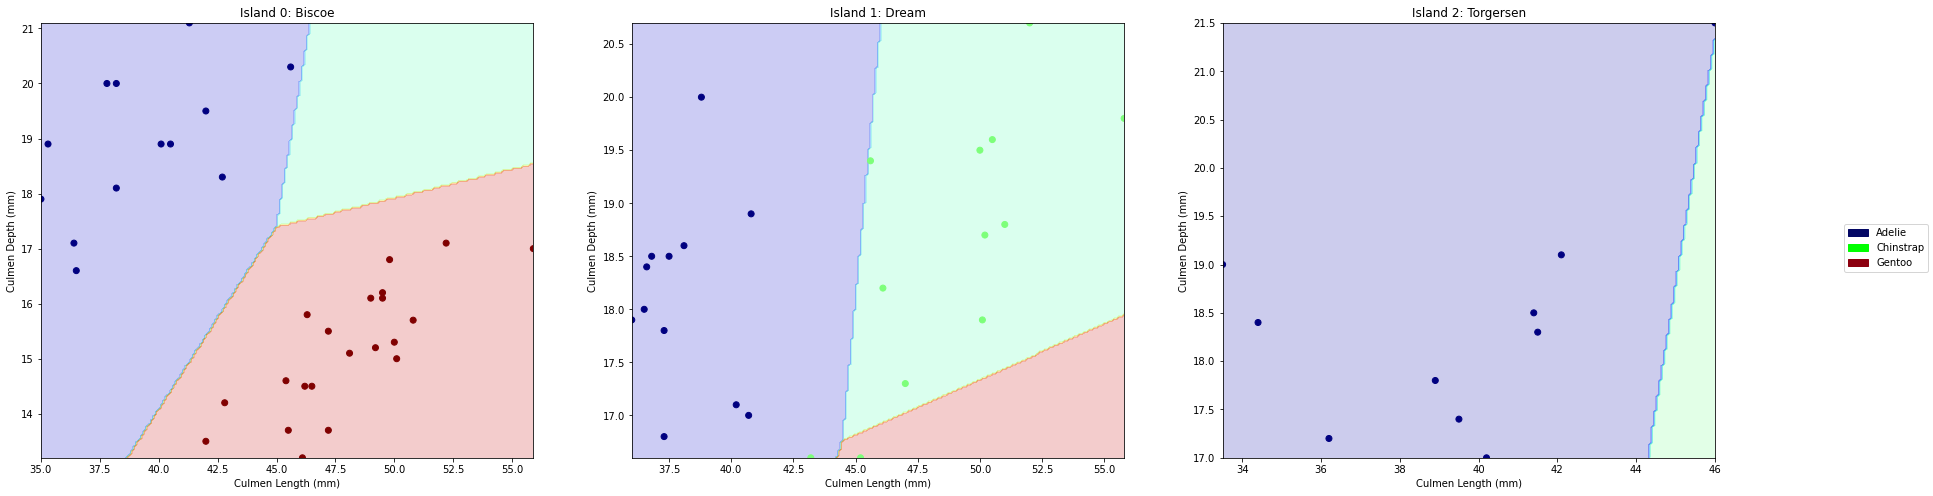

In [15]:
#Decision Region
random.seed(10)
L = log_model
L.fit(X_test1[colsL], y_test1)
plot_regions(L, X_test1[colsL], y_test1)

*   The Logistic Regression model utilizes C-values to optimize the model while also trying to prevent overfitting. However, this creates slight room for error when training the model to prevent the aforementioned overfitting. This intuitively gives reason as to why the confusion matrix displays some errors made by the training data. 
*   The decision regions plotted here reflect the concerns mentioned above. There is slight room for error, shown by the color regions that have no points in them, but are a part of the region for the specified island.

**Model 2: Random Forest**

The idea of how this model works is that the Random Forest is made up of many different decision trees. Random Forest uses a "bagging" method. This means that the dataset is randomly sampled (with replacement), and each decision tree is trained on a different sample. Then each decision tree gives a prediction (in this case, Species). The prediction that is most common among the trees is then selected as the overall model prediction. For example, if there are 50 trees in the model and 10 trees predict Adelie while 40 predict choose Gentoo, the model's prediction will be Gentoo.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

np.random.seed(1234)

#cross-validation score before feature selection
check_column_score(cols, RandomForestClassifier())

training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']


0.9764705882352942

In [17]:
#Feature Selection
np.random.seed(1234)
FeatureSelection(RandomForestClassifier())

training with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
CV score is 0.98
training with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.977
training with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Island']
CV score is 0.965
training with columns ['Culmen Length (mm)', 'Delta 15 N (o/oo)', 'Island']
CV score is 0.977
training with columns ['Culmen Length (mm)', 'Delta 13 C (o/oo)', 'Island']
CV score is 0.969
training with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.852
training with columns ['Culmen Depth (mm)', 'Body Mass (g)', 'Island']
CV score is 0.809
training with columns ['Culmen Depth (mm)', 'Delta 15 N (o/oo)', 'Island']
CV score is 0.856
training with columns ['Culmen Depth (mm)', 'Delta 13 C (o/oo)', 'Island']
CV score is 0.918
training with columns ['Flipper Length (mm)', 'Body Mass (g)', 'Island']
CV score is 0.867
training with columns ['Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Isla

The results from running Feature Selection suggest that Culmen Length (mm), Culmen Depth (mm), and Island are the best features to use in the model, as it produced the highest cross-validation score.

In [18]:
#Cross-Validation for choosing value of n_estimators
np.random.seed(1234)

#selected columns from Feature Selection results
colsF = ["Island", "Culmen Length (mm)", "Culmen Depth (mm)"]

best_score = 0

L = [10, 50, 200, 500, 1000]

#for loop to find which value of n_estimators from list L gives the best
## cross-validation score
for n in L:
    F = RandomForestClassifier(n_estimators = n)
    cv_score = cross_val_score(F, X_train[colsF], y_train, cv = 10).mean()
    if cv_score > best_score:
        best_n = n
        best_score = cv_score
        
print("Best n_estimator is " + str(best_n) + ". Best score is "
      + str(best_score) + ".")

Best n_estimator is 200. Best score is 0.9804615384615385.


In [19]:
np.random.seed(1234)

#train the model on the training data
f = RandomForestClassifier(n_estimators = 200)
f.fit(X_train[colsF], y_train)

#score the model on the test data
f.score(X_test[colsF], y_test)

1.0

In [20]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

y_train_pred = f.predict(X_train[colsF])

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[104,   0,   0],
       [  0,  55,   0],
       [  0,   0,  97]], dtype=int64)

In [21]:
#outlines the errors in predictions made by the model
mistakes = X_train[y_train != y_train_pred]
mistake_labels = y_train[y_train != y_train_pred]
mistake_preds = y_train_pred[y_train != y_train_pred]

mistake_preds, mistake_labels

(array([], dtype=int32), Series([], Name: Species, dtype: int32))

This Random Forest model achieved a score of 100% on the test data. Because of this, our confusion matrix shows that the model has not mistakenly predicted one penguin species as another, and this can be seen from the zeroes (0) in the array. The diagonal values shows the penguins which were correctly predicted for each species, which in this case was all of them. Additionally, when we look at the array of the model's mistakes, it is empty for the same reason.

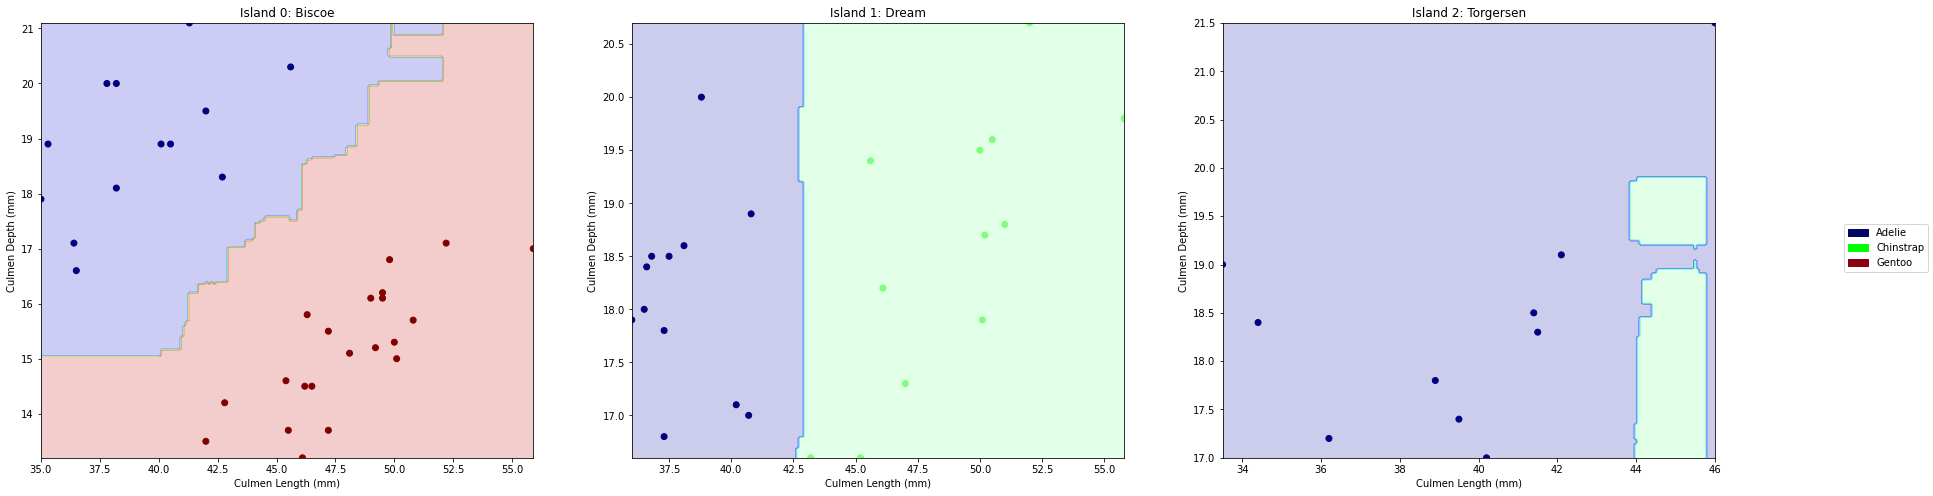

In [22]:
#Decision Region
np.random.seed(1234)
RF = RandomForestClassifier(n_estimators = 200)
RF.fit(X_test[colsF], y_test)
plot_regions(RF, X_test[colsF], y_test)

These decision regions reflect the 100% accuracy of the model. Plot 1 and 2 appear very good in their predictions, but Plot 3 incorrectly predicts Chinstrap penguins for a portion of the region. This implies that if I had more data, the model may classify some penguins on Torgersen island as Chinstrap penguins instead of Adelie penguins. Therefore, although I did receive 100% accuracy on our testing data, the model may produce inaccuracies given more testing data. 

**Model 3: Neural Network**

A multilayer perceptron is a form of the neural network and it works by training layers of "neurons" which are very simple mathematcial functions designed to adapt to nonlinearities in the data. Perceptrons with many layers of many neurons are able to fit a wide variety of data but that also makes it more prone to overfitting. Conceptually, multilayer perceptrons are composed on an input layer to recieve the signals and an output later that will make predicitions based on the given input.

In [4]:
# set up
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import random

np.random.seed(10) # set random seed

X_train3 = X_train
X_test3 = X_test
y_train3 = y_train
y_test3 = y_test 

# create instance of MLPClassifier
NN = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', 
                   solver='adam', max_iter=10000) 


In [24]:
# Feature Selection
np.random.seed(10)
FeatureSelection(NN) # select which features to train with

training with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
CV score is 0.961
training with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.583
training with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Island']
CV score is 0.305
training with columns ['Culmen Length (mm)', 'Delta 15 N (o/oo)', 'Island']
CV score is 0.824
training with columns ['Culmen Length (mm)', 'Delta 13 C (o/oo)', 'Island']
CV score is 0.7
training with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.59
training with columns ['Culmen Depth (mm)', 'Body Mass (g)', 'Island']
CV score is 0.258
training with columns ['Culmen Depth (mm)', 'Delta 15 N (o/oo)', 'Island']
CV score is 0.656
training with columns ['Culmen Depth (mm)', 'Delta 13 C (o/oo)', 'Island']
CV score is 0.656
training with columns ['Flipper Length (mm)', 'Body Mass (g)', 'Island']
CV score is 0.297
training with columns ['Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Island

Based on the feature selection performed, it was indicated that the three features `['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']` had the highest cross validation score at 0.961. Therefore moving forward we will use these three features to fit our neural network model.

In [25]:
# fit model with chosen features
np.random.seed(10)
# chosen columns based on feature selection
train_cols = ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 
NN.fit(X_train3[train_cols], y_train3) # fit training data to neural network model
training_score = NN.score(X_train3[train_cols], y_train3) # score model

In [36]:
# cross validation score of model using selected features
np.random.seed(10)
cv_score = cross_val_score(NN, X_train3[train_cols], y_train3, cv = 5).mean()
print("training score: " + str(training_score) + 
      "\naverage cross_validation score: " + str(cv_score)) 

training score: 1.0
average cross_validation score: 0.9298642533936651


In [27]:
# make predictions using training data
np.random.seed(10)
pred_train = NN.predict(X_train3[train_cols])

In [28]:
# model mistakes
np.random.seed(10)
mistakes = X_train3[y_train3 != pred_train] 
mistake_labels = y_train3[y_train3 != pred_train]
mistake_preds = pred_train[y_train3 != pred_train]

In [29]:
# confusion matrix
np.random.seed(10)
print(confusion_matrix(y_train3, pred_train))

[[104   0   0]
 [  0  55   0]
 [  0   0  97]]


The neural network model had a training score of 1, meaning it was 100% accurate in its predictions. This result is further supported by the confusion matrix as it shows that the model was able to corrrectly predict the species of the penguins 100% of the time. The model correctly predicted that there were indeed 104 Adelie penguins, 55 Chinstrap penguins and 97 Gentoo penguins.

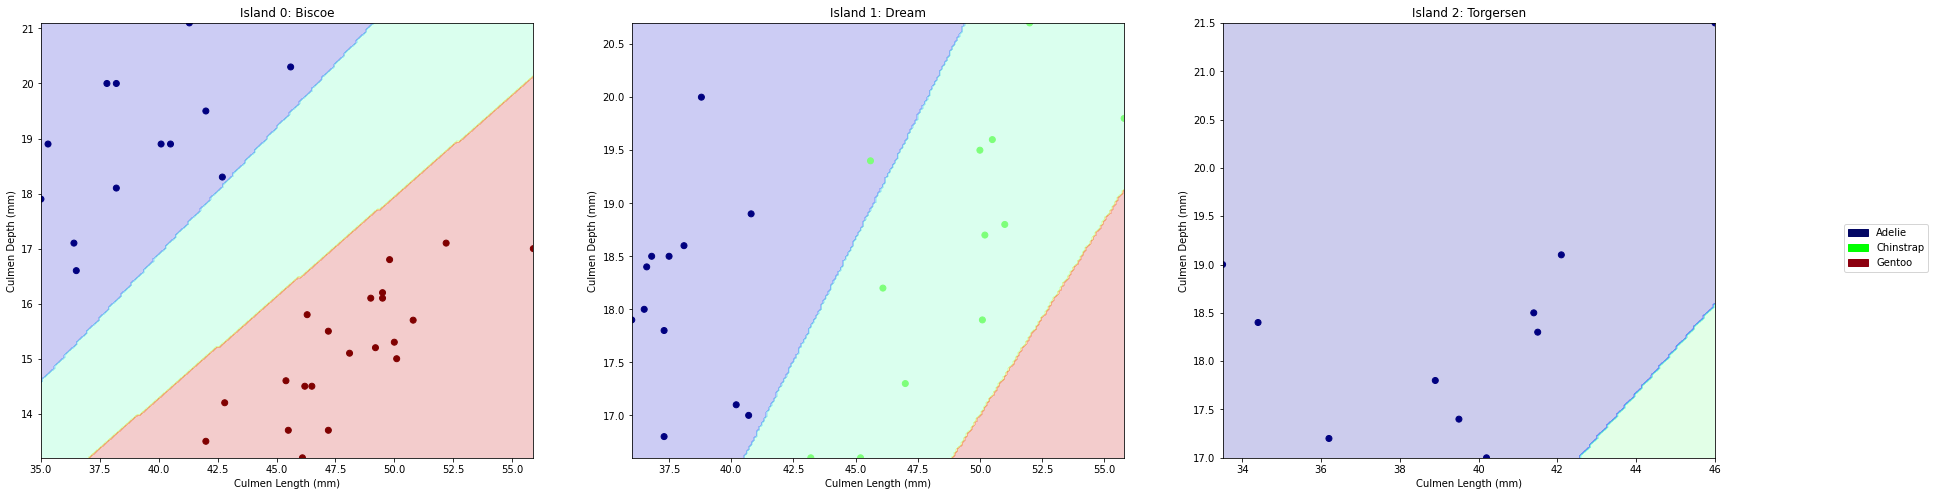

In [37]:
# Decision Regions
from sklearn.neural_network import MLPClassifier

np.random.seed(10)

N = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', 
                  solver='adam', max_iter=10000)
N.fit(X_test3[train_cols], y_test3)
plot_regions(N, X_test3[train_cols], y_test3)

The decision regions for the neural network model indicates that the model had a high accuracy in its predictions. As you can see from the various plots, the dots, which are color coded to represent a specific species, are mostly correctly placed in the regions in which they are predicted. Although the neural network model had 100% accuracy on the test data, on unseen data it was slightly less accurate but still performed relatively well. 

## Discussion
After testing all three models these were my results:

*   The Logistic Regression (Model 1) performed with approximately 95.6% accuracy.  

*   The Random Forest (Model 2) performed with 100% accuracy.

*   The Neural Network (Model 3) performed with 100% accuracy.  

Therefore, I recommend the Random Forest model with features: Island, Culmen Length (mm), and Culmen Depth (mm). 


This model could be improved if the dataset that was used (Palmer Penguins dataset) was larger and contained a larger sample of penguins. 

Additionally, this model could be improved if the data set had additional distiguishing characteristics of penguins such as primary penguin food sources or eye color were provided.